# 多项式回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
x1 = np.random.uniform(-3,3,size=100)
x2 = np.random.uniform(-3,3,size=100)
X = np.hstack([x1.reshape(100,1), x2.reshape(100,1)])

In [53]:
y = 0.5 * x1 ** 2 + x1 + x2**3 + 2 + np.random.normal(0,1,size = 100)

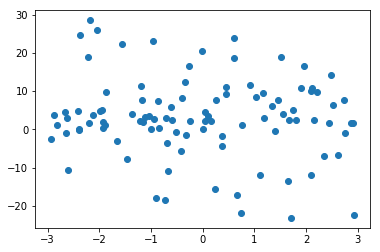

In [19]:
plt.scatter(x, y)
plt.show()

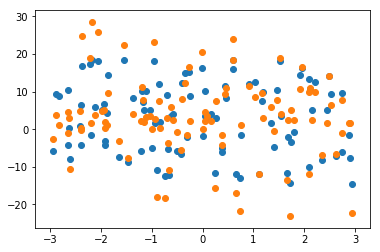

In [20]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X, y)
y_predict = linear.predict(X)
plt.scatter(x, y_predict)
plt.scatter(x, y)
plt.show()

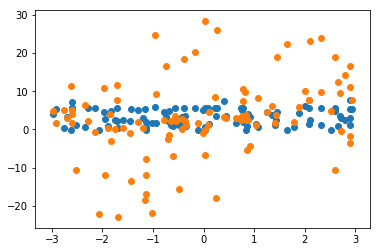

In [28]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(np.hstack([X, X**2,X**3,X**4]), y)
y_predict = linear.predict(np.hstack([X, X**2,X**3,X**4]))
plt.scatter(x1, y_predict)
plt.scatter(x1, y)
plt.show()

In [22]:
linear.coef_

array([ 1.10787371,  0.02840424,  0.78452854, -0.20456811, -0.00791793,
        0.97898507, -0.02454968,  0.03058849])

In [23]:
linear.intercept_

1.702867839095099

In [45]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(100,1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0,1,100)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly = PolynomialFeatures(degree = 2)

In [47]:
poly.fit(X)
X_changed = poly.transform(X)

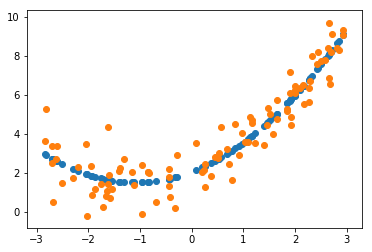

0.9072598979874746

In [51]:
linear = LinearRegression()
linear.fit(X_changed, y)
y_predict = linear.predict(X_changed)
plt.scatter(x, y_predict)
plt.scatter(x, y)
plt.show()
X_train , X_test, y_train, y_test = train_test_split(X_changed, y)
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

In [72]:
poly = PolynomialFeatures(degree = 3)
poly.fit(X)
X_changed = poly.transform(X)
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X_changed, y)
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.9910092702601287

In [69]:
linear.coef_

array([-2.63838667e+10,  7.67856366e-01, -5.70887114e-01,  3.91989892e-01,
       -7.56842166e-01, -1.08768628e-01, -3.00296720e-04,  4.00482051e-01,
        9.38435800e-01,  1.60471490e+00, -6.71020662e-04,  4.51840485e-01,
        5.87258876e-02,  4.97166019e-02,  7.10428854e-02,  1.16986973e-02,
       -1.59105563e-01, -3.40128848e-01, -4.89627144e-02, -1.32468680e-01,
       -1.47911412e-01,  1.95472474e-03, -4.48876133e-02, -6.29422285e-03,
       -2.95047374e-02, -1.05957592e-02,  1.15136657e-02, -7.33902451e-03,
       -4.75049390e-04,  1.22884193e-02,  2.55533503e-02,  3.40674715e-03,
        2.76067761e-02,  7.21058394e-03,  2.14780140e-03,  9.65853763e-03])

In [73]:
linear.coef_

array([ 0.        ,  1.09162768,  0.14058813,  0.43854111, -0.00300282,
       -0.03525095,  0.01188711, -0.02921832, -0.02297228,  0.98588909])

In [77]:
linear.intercept_

2.2209925220275126

In [78]:
from sklearn.preprocessing import StandardScaler

# PipeLine

In [117]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(100,1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0,1,100)

In [118]:
from sklearn.pipeline import Pipeline

In [119]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree = 10)),
    ("standard_scaler", StandardScaler()),
    ("lin_reg",LinearRegression())
])
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

In [152]:
def poly_regression(d):
    return Pipeline([

    ("poly", PolynomialFeatures(degree = d)),
    ("standard_scaler", StandardScaler()),
    ("lin_reg",LinearRegression())
])

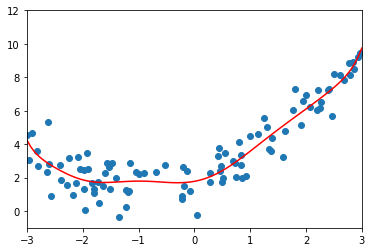

In [120]:
x_pre = np.linspace(-3,3,100).reshape(-1,1)
plt.plot(x_pre, poly_reg.predict(x_pre),c = 'r')
plt.scatter(x, y)
plt.axis([-3,3,-1,12])
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predict)

0.8449577728776384

In [162]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(100,1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0,1,100)
X_train , X_test, y_train, y_test = train_test_split(X, y)

In [163]:
train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict[:i]))
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

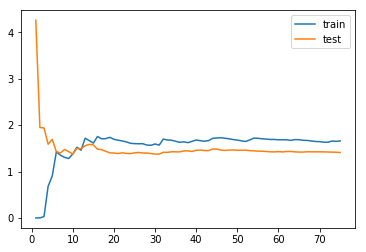

In [164]:
plt.plot([i for i in range(1,76)], np.sqrt(train_score), label = "train")
plt.plot([i for i in range(1,76)], np.sqrt(test_score), label = "test")
plt.legend()
plt.show()

In [173]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(100,1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0,1,100)
X_train , X_test, y_train, y_test = train_test_split(X, y)
train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = poly_regression(3)
    lin_reg.fit(X_train[:i], y_train[:i])
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict[:i]))
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

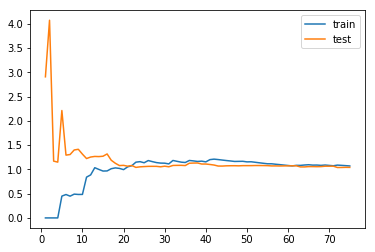

In [174]:
plt.plot([i for i in range(1,76)], np.sqrt(train_score), label = "train")
plt.plot([i for i in range(1,76)], np.sqrt(test_score), label = "test")
plt.legend()
plt.show()